# 📐 ML Workshop - Calculus Foundations

**Author:** Shuvam Banerji Seal

This notebook covers the calculus foundations essential for understanding neural networks:
- Limits and Continuity
- Derivatives and the Chain Rule
- Gradients and Partial Derivatives
- Integration (for understanding loss landscapes)

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import display, Math

# Set plotting style
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Neon colors
CYAN = '#00d9ff'
PINK = '#ff6b9d'
YELLOW = '#c8ff00'
GREEN = '#00ff88'

## 1. Limits: The Foundation of Calculus

$$\lim_{x \to a} f(x) = L$$

"As $x$ approaches $a$, $f(x)$ approaches $L$"

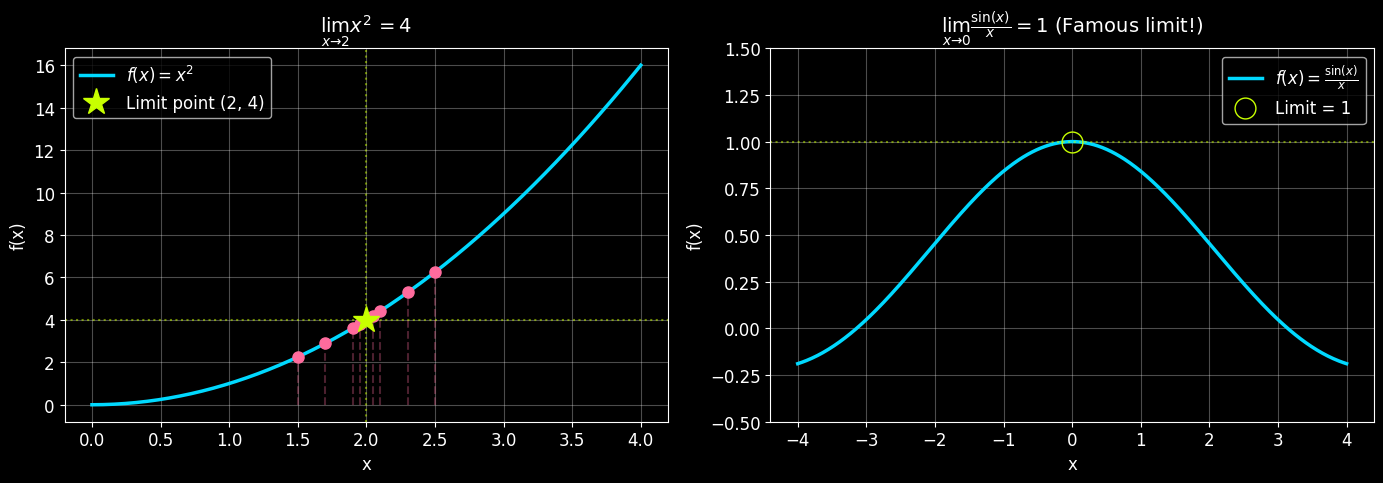

In [2]:
# Visualize limit concept
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Example 1: lim(x→2) of x²
ax1 = axes[0]
x = np.linspace(0, 4, 200)
y = x**2

ax1.plot(x, y, color=CYAN, linewidth=2.5, label=r'$f(x) = x^2$')

# Show approach from both sides
approach_x = [1.5, 1.7, 1.9, 1.95, 2.05, 2.1, 2.3, 2.5]
for xi in approach_x:
    ax1.plot(xi, xi**2, 'o', color=PINK, markersize=8)
    ax1.plot([xi, xi], [0, xi**2], '--', color=PINK, alpha=0.3)

# Mark the limit point
ax1.plot(2, 4, '*', color=YELLOW, markersize=20, label='Limit point (2, 4)')
ax1.axhline(y=4, color=YELLOW, linestyle=':', alpha=0.5)
ax1.axvline(x=2, color=YELLOW, linestyle=':', alpha=0.5)

ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title(r'$\lim_{x \to 2} x^2 = 4$', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Example 2: lim(x→0) of sin(x)/x = 1
ax2 = axes[1]
x = np.linspace(-4, 4, 500)
x = x[x != 0]  # Remove x=0
y = np.sin(x) / x

ax2.plot(x, y, color=CYAN, linewidth=2.5, label=r'$f(x) = \frac{\sin(x)}{x}$')
ax2.plot(0, 1, 'o', color=YELLOW, markersize=15, fillstyle='none', linewidth=3, 
         label='Limit = 1')
ax2.axhline(y=1, color=YELLOW, linestyle=':', alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.set_title(r'$\lim_{x \to 0} \frac{\sin(x)}{x} = 1$ (Famous limit!)', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.5, 1.5)

plt.tight_layout()
plt.show()

## 2. Derivatives: Rate of Change

$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

The derivative tells us **how fast** a function is changing at any point.

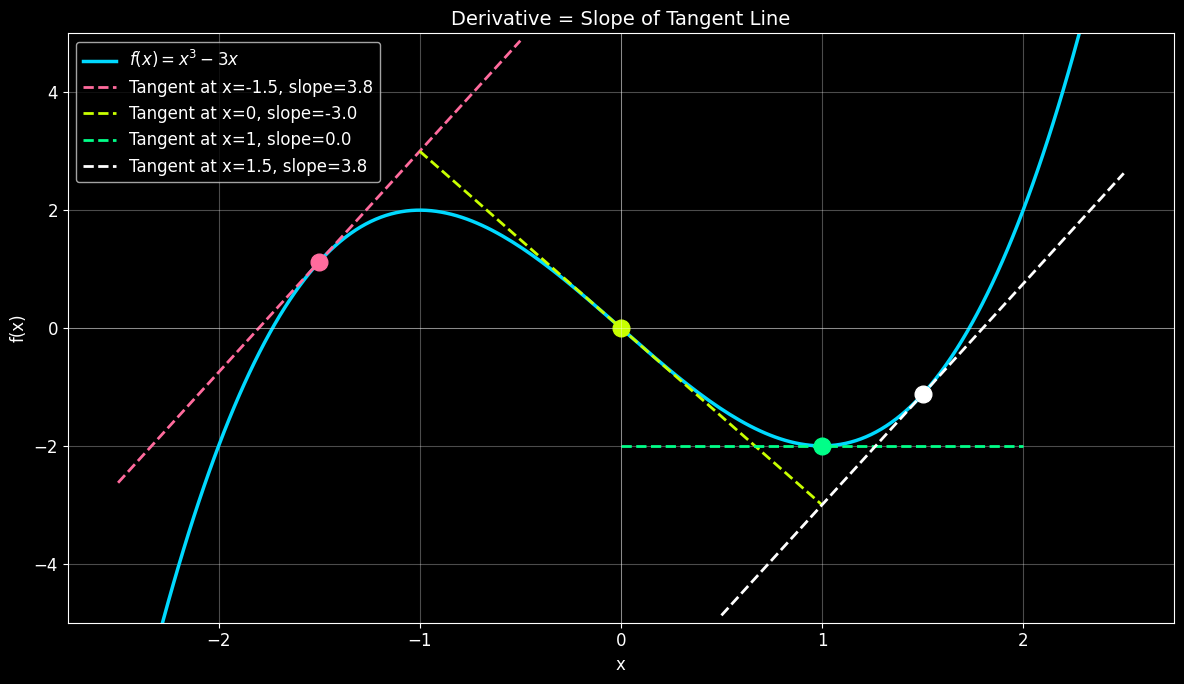


📊 Derivative Values:
   f'(-1.5) = 3.8
   f'(0) = -3.0
   f'(1) = 0.0
   f'(1.5) = 3.8


In [3]:
# Visualize derivative as slope of tangent line
fig, ax = plt.subplots(figsize=(12, 7))

# Function: f(x) = x³ - 3x
f = lambda x: x**3 - 3*x
f_prime = lambda x: 3*x**2 - 3  # Derivative

x = np.linspace(-2.5, 2.5, 200)
y = f(x)

ax.plot(x, y, color=CYAN, linewidth=2.5, label=r'$f(x) = x^3 - 3x$')

# Draw tangent lines at several points
tangent_points = [-1.5, 0, 1, 1.5]
colors = [PINK, YELLOW, GREEN, 'white']

for x0, color in zip(tangent_points, colors):
    y0 = f(x0)
    slope = f_prime(x0)
    
    # Tangent line: y - y0 = slope * (x - x0)
    x_tangent = np.linspace(x0 - 1, x0 + 1, 50)
    y_tangent = y0 + slope * (x_tangent - x0)
    
    ax.plot(x_tangent, y_tangent, '--', color=color, linewidth=2,
            label=f"Tangent at x={x0}, slope={slope:.1f}")
    ax.plot(x0, y0, 'o', color=color, markersize=12)

ax.axhline(y=0, color='white', linewidth=0.5, alpha=0.5)
ax.axvline(x=0, color='white', linewidth=0.5, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Derivative = Slope of Tangent Line', fontsize=14)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_ylim(-5, 5)

plt.tight_layout()
plt.show()

print("\n📊 Derivative Values:")
for x0 in tangent_points:
    print(f"   f'({x0}) = {f_prime(x0):.1f}")

## 3. The Chain Rule: Key to Backpropagation

If $y = f(g(x))$, then:

$$\frac{dy}{dx} = \frac{df}{dg} \cdot \frac{dg}{dx}$$

This is the mathematical foundation of backpropagation!

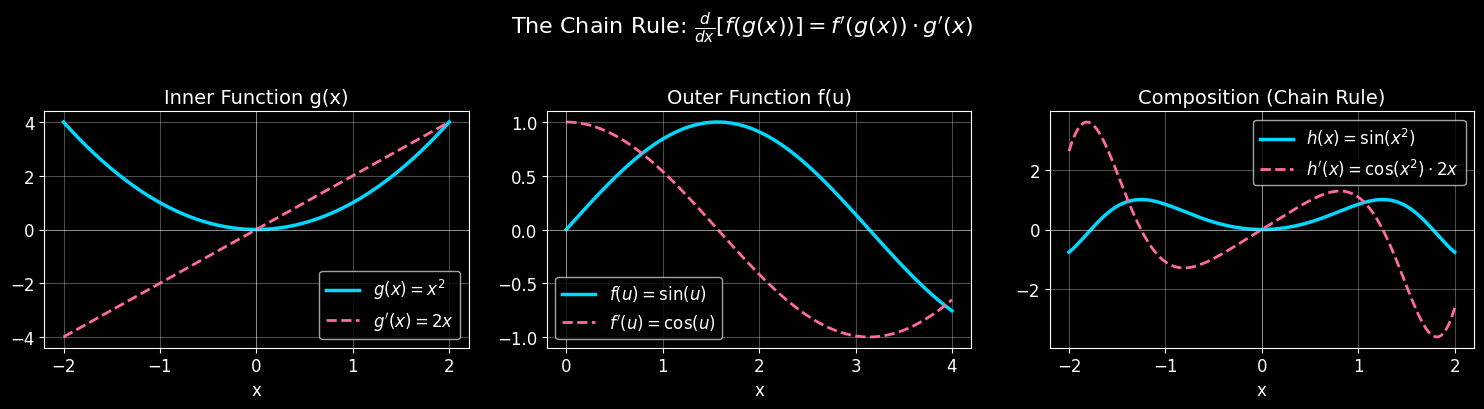


🔗 Chain Rule Application:
   d/dx[sin(x²)] = cos(x²) · 2x
   At x=1: derivative = cos(1) · 2 ≈ 1.0806046117362795


In [4]:
# Demonstrate chain rule
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

x = np.linspace(-2, 2, 200)

# g(x) = x²
g = lambda x: x**2
g_prime = lambda x: 2*x

# f(u) = sin(u)  where u = g(x)
f = lambda u: np.sin(u)
f_prime = lambda u: np.cos(u)

# Composition: (f ∘ g)(x) = sin(x²)
fog = lambda x: f(g(x))
# Chain rule: d/dx[sin(x²)] = cos(x²) * 2x
fog_prime = lambda x: f_prime(g(x)) * g_prime(x)

# Plot g(x)
axes[0].plot(x, g(x), color=CYAN, linewidth=2.5, label=r'$g(x) = x^2$')
axes[0].plot(x, g_prime(x), '--', color=PINK, linewidth=2, label=r"$g'(x) = 2x$")
axes[0].set_title('Inner Function g(x)', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot f(u)
u = np.linspace(0, 4, 200)
axes[1].plot(u, f(u), color=CYAN, linewidth=2.5, label=r'$f(u) = \sin(u)$')
axes[1].plot(u, f_prime(u), '--', color=PINK, linewidth=2, label=r"$f'(u) = \cos(u)$")
axes[1].set_title('Outer Function f(u)', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot composition and its derivative
axes[2].plot(x, fog(x), color=CYAN, linewidth=2.5, label=r'$h(x) = \sin(x^2)$')
axes[2].plot(x, fog_prime(x), '--', color=PINK, linewidth=2, 
             label=r"$h'(x) = \cos(x^2) \cdot 2x$")
axes[2].set_title('Composition (Chain Rule)', fontsize=14)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

for ax in axes:
    ax.axhline(y=0, color='white', linewidth=0.5, alpha=0.5)
    ax.axvline(x=0, color='white', linewidth=0.5, alpha=0.5)
    ax.set_xlabel('x')

plt.suptitle('The Chain Rule: $\\frac{d}{dx}[f(g(x))] = f\'(g(x)) \\cdot g\'(x)$', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\n🔗 Chain Rule Application:")
print("   d/dx[sin(x²)] = cos(x²) · 2x")
print("   At x=1: derivative = cos(1) · 2 ≈", np.cos(1) * 2)

## 4. Partial Derivatives and Gradients

For functions of multiple variables $f(x, y)$:

$$\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)$$

The gradient points in the direction of steepest ascent.

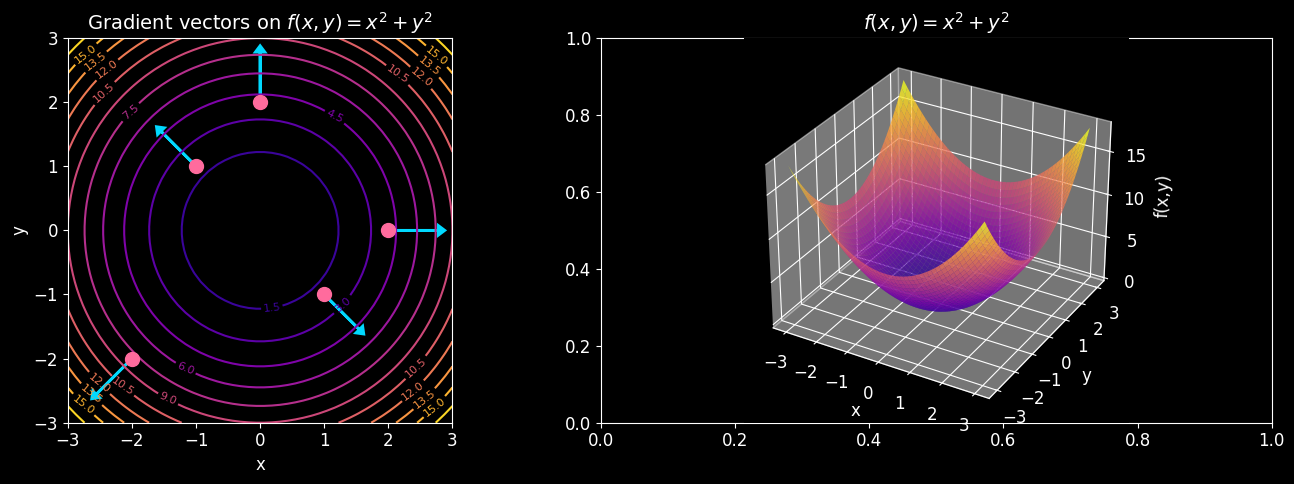


🎯 Gradient Interpretation:
   ∇f = (2x, 2y) points AWAY from the minimum (0,0)
   To minimize, we go in the OPPOSITE direction: -∇f
   This is GRADIENT DESCENT!


In [5]:
# Visualize gradient on a 2D function
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Define a simple quadratic function: f(x,y) = x² + y²
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# Left: Contour plot with gradient vectors
ax1 = axes[0]
contour = ax1.contour(X, Y, Z, levels=15, cmap='plasma')
ax1.clabel(contour, inline=True, fontsize=8)

# Gradient vectors at selected points
points = [(-2, -2), (-1, 1), (1, -1), (2, 0), (0, 2)]
for px, py in points:
    # Gradient of x² + y² is (2x, 2y)
    grad_x, grad_y = 2*px, 2*py
    # Normalize for visualization
    norm = np.sqrt(grad_x**2 + grad_y**2)
    if norm > 0:
        ax1.arrow(px, py, grad_x/(norm+0.1)*0.8, grad_y/(norm+0.1)*0.8, 
                  head_width=0.15, head_length=0.1, fc=CYAN, ec=CYAN, linewidth=2)
    ax1.plot(px, py, 'o', color=PINK, markersize=10)

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title(r'Gradient vectors on $f(x,y) = x^2 + y^2$', fontsize=14)
ax1.set_aspect('equal')

# Right: 3D surface plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='plasma', alpha=0.8, linewidth=0)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x,y)')
ax2.set_title(r'$f(x,y) = x^2 + y^2$', fontsize=14)

plt.tight_layout()
plt.show()

print("\n🎯 Gradient Interpretation:")
print("   ∇f = (2x, 2y) points AWAY from the minimum (0,0)")
print("   To minimize, we go in the OPPOSITE direction: -∇f")
print("   This is GRADIENT DESCENT!")

## 5. Gradient Descent Visualization

Update rule:
$$\theta_{t+1} = \theta_t - \alpha \nabla f(\theta_t)$$

Where $\alpha$ is the learning rate.

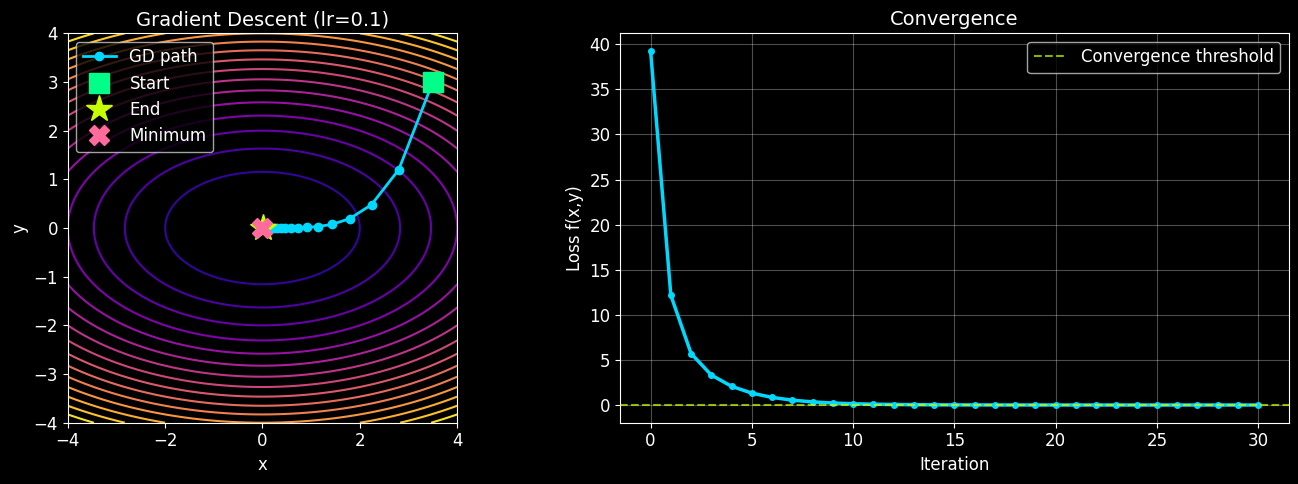


📉 Gradient Descent Results:
   Started at: (3.5, 3.0)
   Final position: (0.0043, 0.0000)
   Final loss: 0.000019


In [6]:
# Animate gradient descent
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Function: f(x,y) = x² + 3y² (elliptical bowl)
f = lambda x, y: x**2 + 3*y**2
grad_f = lambda x, y: (2*x, 6*y)

# Contour plot
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax1 = axes[0]
contour = ax1.contour(X, Y, Z, levels=20, cmap='plasma')

# Perform gradient descent
learning_rate = 0.1
start = (3.5, 3.0)
path = [start]

x_curr, y_curr = start
for _ in range(30):
    gx, gy = grad_f(x_curr, y_curr)
    x_curr = x_curr - learning_rate * gx
    y_curr = y_curr - learning_rate * gy
    path.append((x_curr, y_curr))

path = np.array(path)

# Plot path
ax1.plot(path[:, 0], path[:, 1], 'o-', color=CYAN, markersize=6, linewidth=2, label='GD path')
ax1.plot(path[0, 0], path[0, 1], 's', color=GREEN, markersize=15, label='Start')
ax1.plot(path[-1, 0], path[-1, 1], '*', color=YELLOW, markersize=20, label='End')
ax1.plot(0, 0, 'X', color=PINK, markersize=15, label='Minimum')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title(f'Gradient Descent (lr={learning_rate})', fontsize=14)
ax1.legend()
ax1.set_aspect('equal')

# Loss over iterations
ax2 = axes[1]
losses = [f(p[0], p[1]) for p in path]
ax2.plot(losses, color=CYAN, linewidth=2.5, marker='o', markersize=4)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Loss f(x,y)')
ax2.set_title('Convergence', fontsize=14)
ax2.grid(True, alpha=0.3)

# Mark convergence threshold
ax2.axhline(y=0.01, color=YELLOW, linestyle='--', alpha=0.7, label='Convergence threshold')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"\n📉 Gradient Descent Results:")
print(f"   Started at: {start}")
print(f"   Final position: ({path[-1, 0]:.4f}, {path[-1, 1]:.4f})")
print(f"   Final loss: {losses[-1]:.6f}")

## 6. Learning Rate Effects

The learning rate $\alpha$ is crucial:
- Too small: Slow convergence
- Too large: Oscillation or divergence

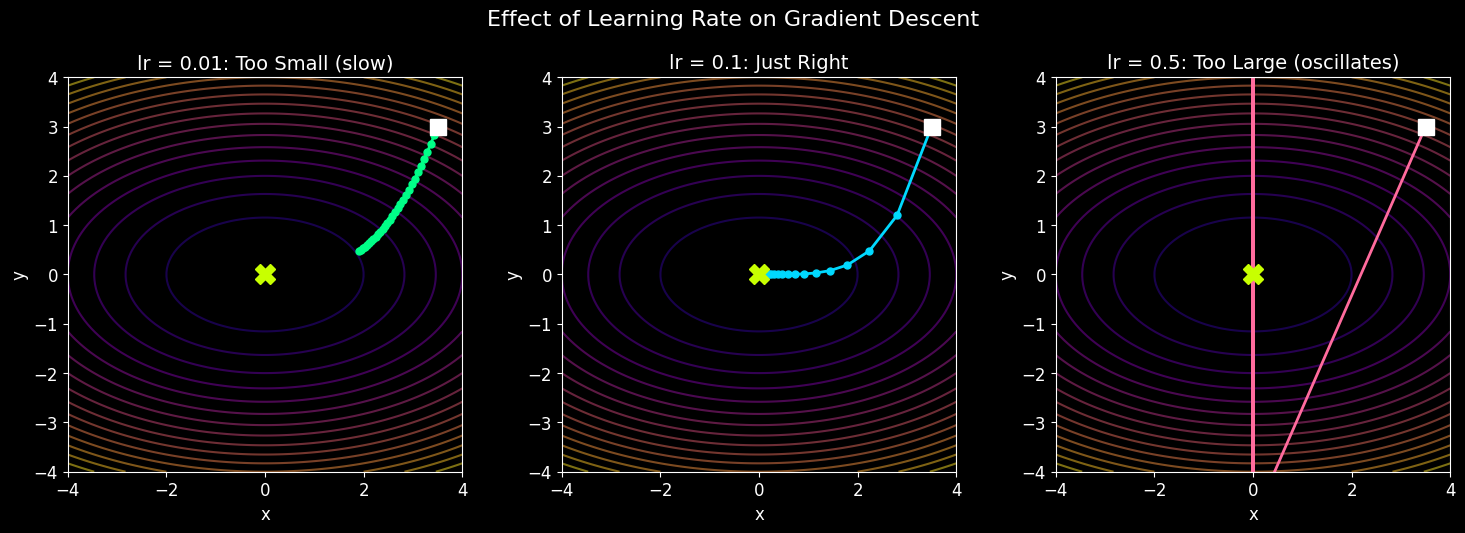

In [7]:
# Compare different learning rates
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

learning_rates = [0.01, 0.1, 0.5]
titles = ['Too Small (slow)', 'Just Right', 'Too Large (oscillates)']
colors_lr = [GREEN, CYAN, PINK]

for ax, lr, title, color in zip(axes, learning_rates, titles, colors_lr):
    # Background contour
    ax.contour(X, Y, Z, levels=20, cmap='plasma', alpha=0.5)
    
    # Gradient descent path
    x_curr, y_curr = 3.5, 3.0
    path = [(x_curr, y_curr)]
    
    for _ in range(30):
        gx, gy = grad_f(x_curr, y_curr)
        x_curr = x_curr - lr * gx
        y_curr = y_curr - lr * gy
        # Clip to prevent explosion
        x_curr = np.clip(x_curr, -5, 5)
        y_curr = np.clip(y_curr, -5, 5)
        path.append((x_curr, y_curr))
    
    path = np.array(path)
    ax.plot(path[:, 0], path[:, 1], 'o-', color=color, markersize=5, linewidth=2)
    ax.plot(path[0, 0], path[0, 1], 's', color='white', markersize=12)
    ax.plot(0, 0, 'X', color=YELLOW, markersize=15)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'lr = {lr}: {title}', fontsize=14)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')

plt.suptitle('Effect of Learning Rate on Gradient Descent', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 7. Integration (Bonus): Area Under Curves

$$\int_a^b f(x) dx = \lim_{n \to \infty} \sum_{i=1}^{n} f(x_i) \Delta x$$

Used in probability (PDFs), expected values, and more!

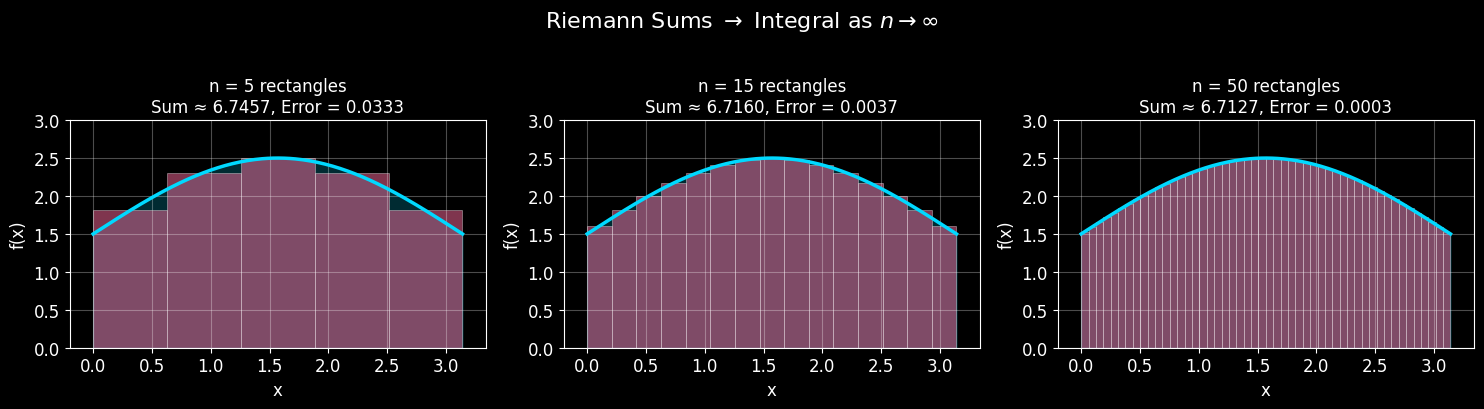


∫ True integral value: 6.7124


In [8]:
# Visualize Riemann sums approaching integral
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

f = lambda x: np.sin(x) + 1.5  # Shifted sine
a, b = 0, np.pi

x_fine = np.linspace(a, b, 200)
y_fine = f(x_fine)

n_rects_list = [5, 15, 50]

for ax, n_rects in zip(axes, n_rects_list):
    ax.plot(x_fine, y_fine, color=CYAN, linewidth=2.5)
    ax.fill_between(x_fine, 0, y_fine, alpha=0.2, color=CYAN)
    
    # Draw rectangles
    dx = (b - a) / n_rects
    riemann_sum = 0
    
    for i in range(n_rects):
        x_left = a + i * dx
        height = f(x_left + dx/2)  # Midpoint rule
        riemann_sum += height * dx
        rect = plt.Rectangle((x_left, 0), dx, height, 
                             fill=True, facecolor=PINK, edgecolor='white', 
                             alpha=0.5, linewidth=0.5)
        ax.add_patch(rect)
    
    true_integral = 2 + np.pi * 1.5  # Analytical result
    error = abs(riemann_sum - true_integral)
    
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title(f'n = {n_rects} rectangles\nSum ≈ {riemann_sum:.4f}, Error = {error:.4f}', fontsize=12)
    ax.set_xlim(a - 0.2, b + 0.2)
    ax.set_ylim(0, 3)
    ax.grid(True, alpha=0.3)

plt.suptitle(r'Riemann Sums $\to$ Integral as $n \to \infty$', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print(f"\n∫ True integral value: {2 + np.pi * 1.5:.4f}")

## 📝 Summary

In this notebook, we covered:

1. **Limits**: Foundation of calculus, approaching values
2. **Derivatives**: Rate of change, slope of tangent line
3. **Chain Rule**: How to differentiate composed functions (critical for backprop!)
4. **Partial Derivatives & Gradients**: Extending derivatives to multiple dimensions
5. **Gradient Descent**: Using gradients to minimize functions
6. **Learning Rate**: The crucial hyperparameter
7. **Integration**: Computing areas, probabilities

**Key ML Connections:**
- Backpropagation = Chain rule applied recursively
- Training = Gradient descent on loss function
- Learning rate = Most important hyperparameter to tune

**Next**: Neural Network Basics!